## MACHINE LEARNING AND ITS TECHNIQUES 

## DIGITAL ASSIGNMENT

## 21MAI0016 - Lebaka Jaswanth 

## 21MAI0026 - Sk Akhil Basha

## Github Repository Link : 

# Classfication Models

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [98]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.shape

(768, 9)

In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Preprocessing

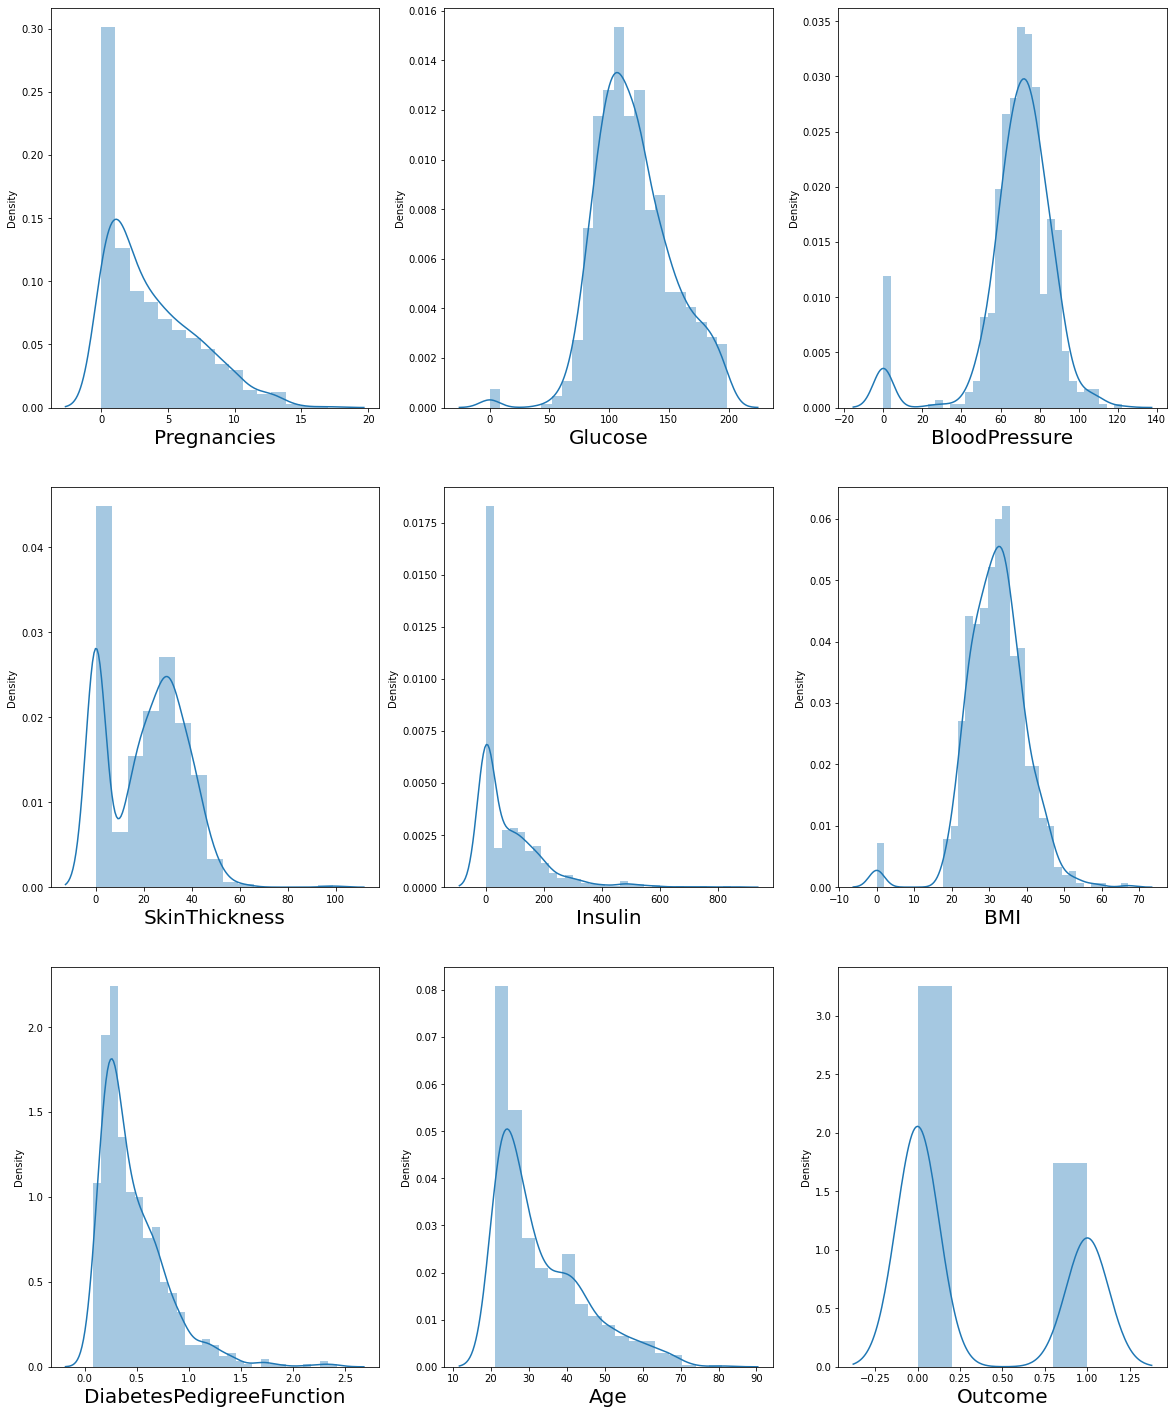

In [103]:
import warnings
warnings.simplefilter('ignore')
no_col = df.shape[1]
plt.figure(figsize=(20,25),facecolor='white')
plot_number = 1

for column in df:
    if(plot_number <= no_col):
        ax = plt.subplot(3,3,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number += 1
plt.show()

In [104]:
df['BMI'] = df['BMI'].replace(0,df.BMI.mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df.BloodPressure.mean())
df['Glucose'] = df['Glucose'].replace(0,df.Glucose.mean())
df['Insulin'] = df['Insulin'].replace(0,df.Insulin.mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df.SkinThickness.mean())

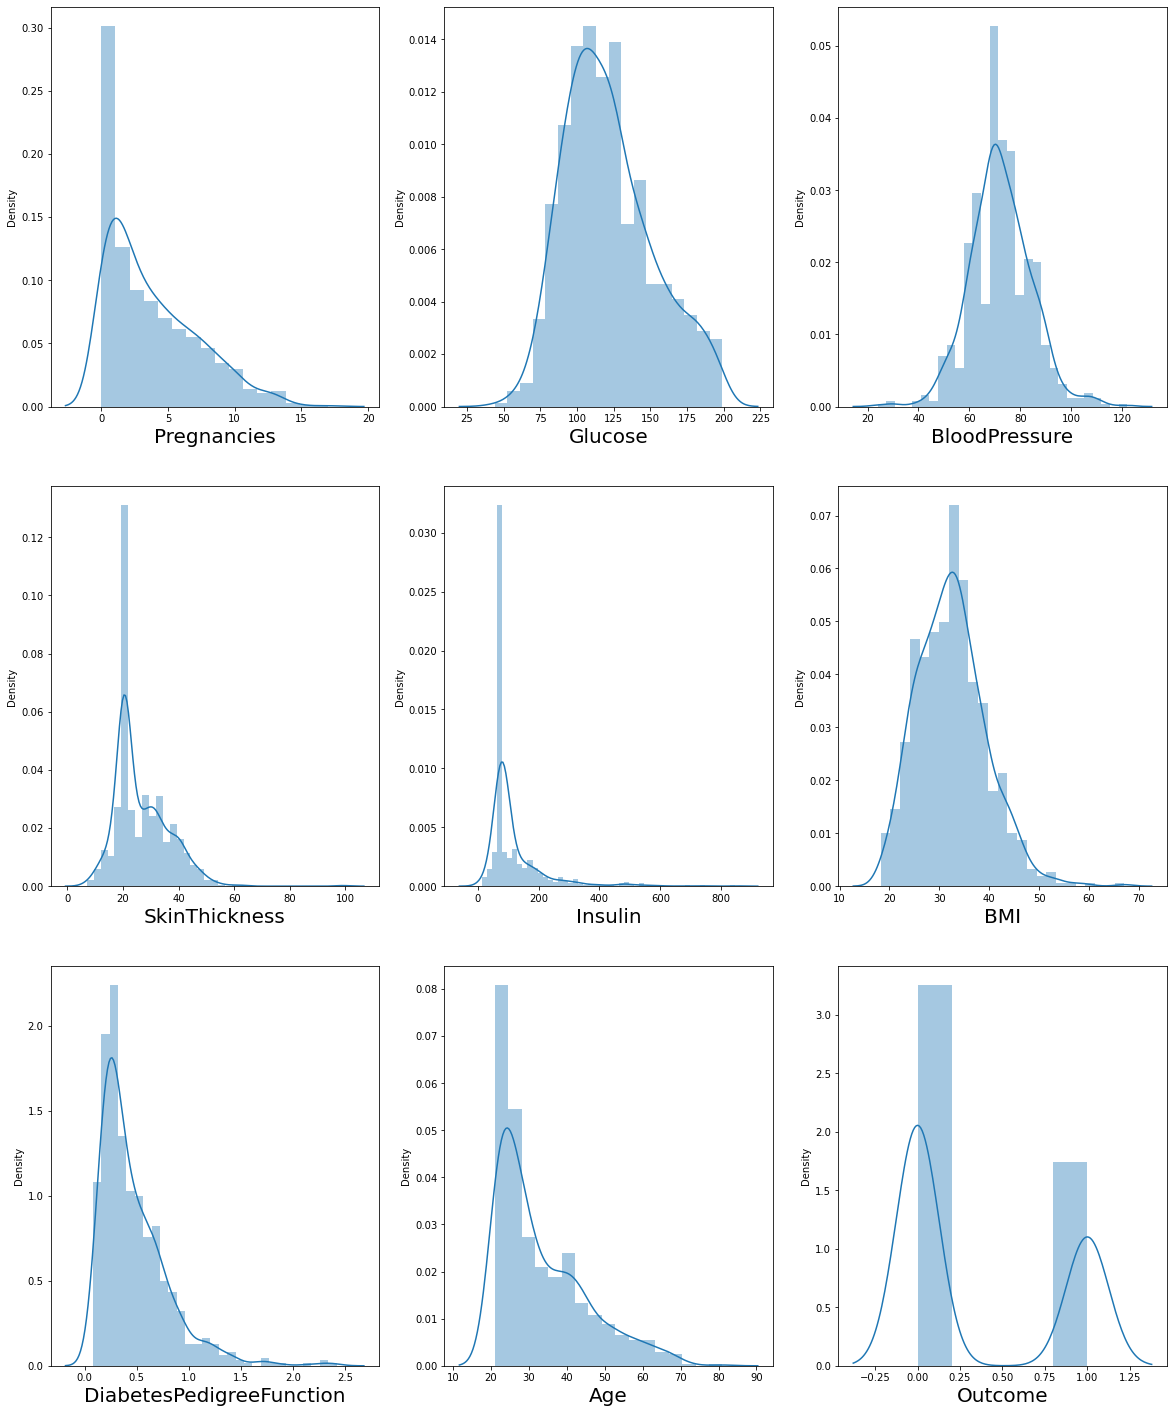

In [105]:
no_col = df.shape[1]
plt.figure(figsize=(20,25),facecolor='white')
plot_number = 1

for column in df:
    if(plot_number <= no_col):
        ax = plt.subplot(3,3,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number += 1
plt.show()

In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


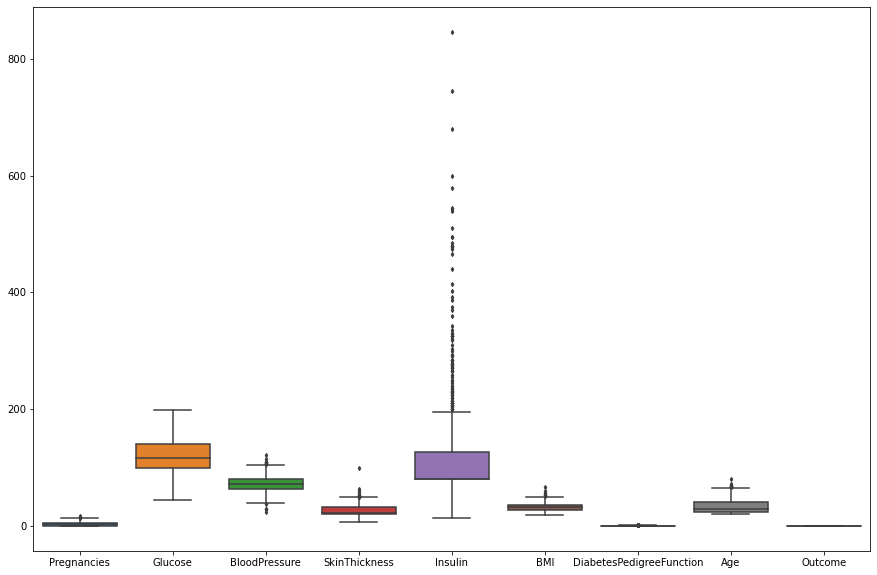

In [107]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, ax=ax, fliersize=3)
plt.show()

In [108]:
t = df.Pregnancies.quantile(0.98)
cleaned_data= df[df.Pregnancies<t]

t = df.SkinThickness.quantile(0.99)
cleaned_data = cleaned_data[cleaned_data.SkinThickness<t]

t = df.BMI.quantile(0.99)
cleaned_data = cleaned_data[cleaned_data.BMI<t]

t = df.Insulin.quantile(0.95)
cleaned_data = cleaned_data[cleaned_data.Insulin<t]

t = df.DiabetesPedigreeFunction.quantile(0.99)
clenaed_data = cleaned_data[cleaned_data.DiabetesPedigreeFunction<t]

t = df.Age.quantile(0.99)
clenaed_data = cleaned_data[cleaned_data.Age<t]

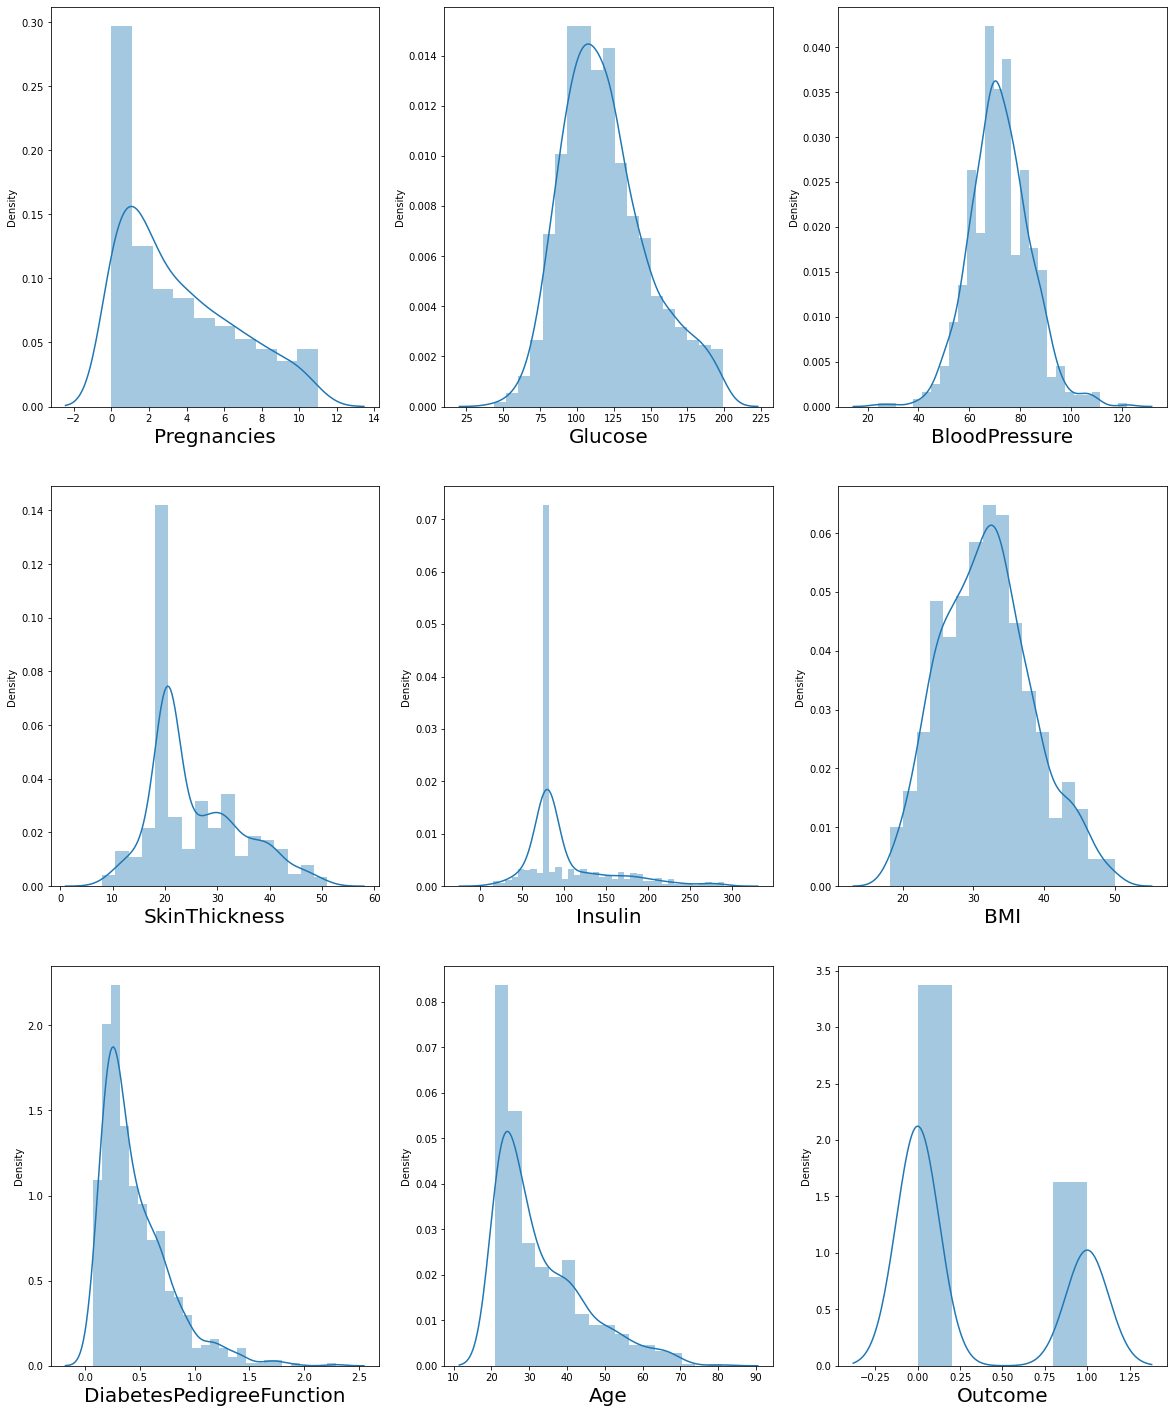

In [109]:
no_col = cleaned_data.shape[1]
plt.figure(figsize=(20,25),facecolor='white')
plot_number = 1

for column in cleaned_data:
    if(plot_number <= no_col):
        ax = plt.subplot(3,3,plot_number)
        sns.distplot(cleaned_data[column])
        plt.xlabel(column,fontsize=20)
    plot_number += 1
plt.show()

In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [111]:
x = cleaned_data.drop('Outcome',axis=1)
y = cleaned_data['Outcome']

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=443)
print(x_train.shape)
print(x_test.shape)

(520, 8)
(174, 8)


# Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

In [116]:
y_pred = lr_clf.predict(x_test)
accuracy_score(y_pred, y_test)

0.8563218390804598

In [117]:
y_pred_train = lr_clf.predict(x_train)
print("Train score : ",accuracy_score(y_train,y_pred_train))

Train score :  0.7711538461538462


# KNN Classifier

In [120]:
#import warnings
#warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [121]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [122]:
y_pred = knn.predict(x_test)
accuracy_score(y_pred, y_test)

0.8103448275862069

In [123]:
knn.score(x_train,y_train)

0.8173076923076923

# Hyperparameter Tuning 

In [124]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [125]:
gridsearch = GridSearchCV(knn,param_grid,verbose=3)
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.683 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.673 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.663 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.731 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.702 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.654 total 

[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.760 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.721 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.683 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.731 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.673 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.731 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3;, score=0.673 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3;, score=0.663 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5;, score=0.731 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5;, score=0.702 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5;, score=0.654 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7;, score=0.615 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7;, score=0.731 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_

[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.692 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.769 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.673 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.654 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.760 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.721 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, 

[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.673 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=3;, score=0.663 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.731 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.702 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=5;, score=0.654 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=7;, score=0.615 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=7;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=7;, score=0.

[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=9;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=9;, score=0.750 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=9;, score=0.692 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=9;, score=0.769 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=9;, score=0.673 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.654 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.760 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10;, score=0.721 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11;, sc

[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.683 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.731 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.673 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.731 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=0.731 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=13;, score=0.702 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=13;, score=0.760 total t

[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=0.673 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=0.663 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.731 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.702 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=0.654 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=7;, score=0.615 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=7;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=7;, score=0.731 total time=   0.0s

[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=0.769 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=0.673 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.654 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.740 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.760 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=0.721 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=0.760 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=0.683 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=0.740 total tim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [126]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [127]:
knn = KNeighborsClassifier(algorithm='ball_tree',leaf_size=18,n_neighbors=13)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=13)

In [128]:
y_pred = knn.predict(x_test)
print("Test score : ",accuracy_score(y_pred,y_test))

Test score :  0.8218390804597702


In [129]:
y_pred_train = knn.predict(x_train)
print("Train score : ",accuracy_score(y_train,y_pred_train))

Train score :  0.75


## K-Fold Cross validation

In [130]:
kfold = KFold(n_splits=12, random_state=42,shuffle = True)
kfold.get_n_splits(x_scaled)

12

In [131]:
from statistics import mean
knn = KNeighborsClassifier(algorithm='ball_tree',leaf_size=18,n_neighbors=13)
cnt = 0
count= []
train_score=[]
test_score=[]

for train_index,test_index in kfold.split(x_scaled):
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(x_train,y_train)
    train_score_ = knn.score(x_train,y_train)
    test_score_ = knn.score(x_test,y_test)
    cnt += 1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ",cnt)
    print("Train Score is : ", train_score_, "and Test score is : ",test_score_)
    
print("Average Train Score is ",mean(train_score))
print("Average Test Score is ",mean(test_score))

for k =  1
Train Score is :  0.7908805031446541 and Test score is :  0.7931034482758621
for k =  2
Train Score is :  0.8050314465408805 and Test score is :  0.7068965517241379
for k =  3
Train Score is :  0.8081761006289309 and Test score is :  0.7241379310344828
for k =  4
Train Score is :  0.8034591194968553 and Test score is :  0.6896551724137931
for k =  5
Train Score is :  0.7987421383647799 and Test score is :  0.7586206896551724
for k =  6
Train Score is :  0.8018867924528302 and Test score is :  0.7413793103448276
for k =  7
Train Score is :  0.7940251572327044 and Test score is :  0.7241379310344828
for k =  8
Train Score is :  0.8050314465408805 and Test score is :  0.7241379310344828
for k =  9
Train Score is :  0.7830188679245284 and Test score is :  0.8620689655172413
for k =  10
Train Score is :  0.800314465408805 and Test score is :  0.7068965517241379
for k =  11
Train Score is :  0.7959183673469388 and Test score is :  0.8596491228070176
for k =  12
Train Score is :  0

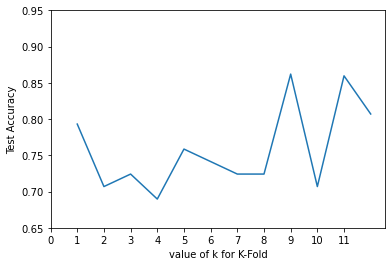

In [132]:
plt.plot(count, test_score)
plt.xlabel('value of k for K-Fold')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(0,12,1))
plt.yticks(np.arange(0.65,1,0.05))
plt.show()

# SVM

# Linear kernel

In [133]:
#linear kernel
from sklearn.svm import SVC
linearsvc = SVC(kernel='linear')
linearsvc.fit(x_train, y_train)

SVC(kernel='linear')

In [134]:
y_pred = linearsvc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7543859649122807

In [135]:
y_pred_train = linearsvc.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.7896389324960753

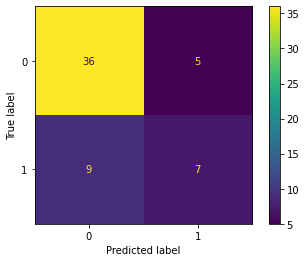

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = linearsvc.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [137]:
import warnings
warnings.simplefilter('ignore')
linear_accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.58      0.44      0.50        16

    accuracy                           0.75        57
   macro avg       0.69      0.66      0.67        57
weighted avg       0.74      0.75      0.74        57



## Polynomial kernel

In [138]:
#polynomial kernel
from sklearn.svm import SVC
polysvc = SVC(kernel='poly', degree = 3)
polysvc.fit(x_train, y_train)

SVC(kernel='poly')

In [139]:
y_pred = polysvc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7719298245614035

In [140]:
y_pred_train = polysvc.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.8100470957613815

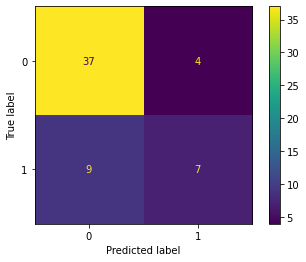

In [141]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = linearsvc.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [142]:
polynomial_accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        41
           1       0.64      0.44      0.52        16

    accuracy                           0.77        57
   macro avg       0.72      0.67      0.68        57
weighted avg       0.76      0.77      0.76        57



In [143]:
degrees = [i for i in range(1,16)]
score = []
for i in degrees:
    polysvc = SVC(kernel='poly', degree = i)
    polysvc.fit(x_train, y_train)
    
    y_pred = polysvc.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

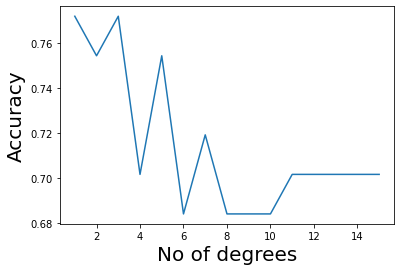

In [144]:
plt.plot(degrees,score)
plt.xlabel('No of degrees',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()

### RBF kernel

In [161]:
from sklearn.svm import SVC
rbfsvc = SVC(kernel='rbf',C=10,gamma=0.01)
rbfsvc.fit(x_train, y_train)

SVC(C=10, gamma=0.01)

In [162]:
y_pred = rbfsvc.predict(x_test)
print("Test accuracy : ",accuracy_score(y_test,y_pred))

Test accuracy :  0.8070175438596491


In [163]:
y_pred_train = rbfsvc.predict(x_train)
print("Train score : ",accuracy_score(y_train,y_pred_train))

Train score :  0.7880690737833596


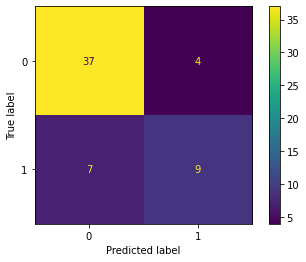

In [164]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = linearsvc.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [165]:
RBF_accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.69      0.56      0.62        16

    accuracy                           0.81        57
   macro avg       0.77      0.73      0.75        57
weighted avg       0.80      0.81      0.80        57



In [166]:
print("Linear Classifier Accuracy - ",linear_accuracy)
print("Polynomial Classifier Accuracy - ",polynomial_accuracy)
print("Gaussian Classifier Accuracy - ",RBF_accuracy)

Linear Classifier Accuracy -  0.7543859649122807
Polynomial Classifier Accuracy -  0.7719298245614035
Gaussian Classifier Accuracy -  0.8070175438596491


# Random Forest Classifier 

In [167]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(n_estimators = 90, random_state=443)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90, random_state=443)

In [168]:
y_pred = rand_clf.predict(x_test)
print("Test accuracy : ",accuracy_score(y_test, y_pred))

Test accuracy :  0.7894736842105263


In [169]:
y_pred_train = rand_clf.predict(x_train)
print("Train score : ",accuracy_score(y_train,y_pred_train))

Train score :  1.0


In [170]:
y_test.value_counts()

0    41
1    16
Name: Outcome, dtype: int64

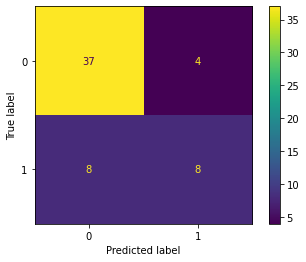

In [171]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = linearsvc.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.67      0.50      0.57        16

    accuracy                           0.79        57
   macro avg       0.74      0.70      0.72        57
weighted avg       0.78      0.79      0.78        57



# Hyper Parameter Tuning

In [173]:
grid_param = {
    "n_estimators" : [90,100,200],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [3,4,5,6,7,8,9,10,11,12],
    'max_features' : ['auto','log2']
}

In [174]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=90,
                                              random_state=443),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [90, 100, 200]},
             verbose=3)

In [175]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 90}

In [176]:
rand_clf = RandomForestClassifier(n_estimators = 90,criterion='entropy',max_features='log2',min_samples_leaf=2,min_samples_split=9,random_state=443)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=9, n_estimators=90,
                       random_state=443)

In [177]:
y_pred = rand_clf.predict(x_test)
print("Test score : ",accuracy_score(y_test,y_pred))

Test score :  0.8245614035087719


In [178]:
y_pred_train = rand_clf.predict(x_train)
print("Train score : ",accuracy_score(y_train,y_pred_train))

Train score :  0.9497645211930926


In [179]:
feature_scores = pd.Series(rand_clf.feature_importances_, index = x.columns).sort_values(ascending=False)
feature_scores

Glucose                     0.314907
BMI                         0.175074
DiabetesPedigreeFunction    0.129584
Age                         0.127081
BloodPressure               0.071578
Insulin                     0.062266
SkinThickness               0.059983
Pregnancies                 0.059528
dtype: float64

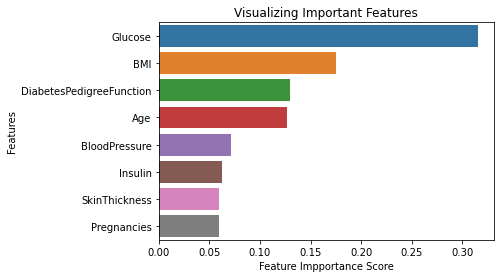

In [180]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature Impportance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# AdaBoost Algorithm

In [181]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [182]:
dtc = DecisionTreeClassifier(max_depth=1)
Ada_clf = AdaBoostClassifier(n_estimators=20,base_estimator=dtc,random_state=443)
Ada_clf.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20, random_state=443)

In [183]:
y_pred = Ada_clf.predict(x_test)
print("Test score : ",accuracy_score(y_test,y_pred))

Test score :  0.8070175438596491


In [184]:
y_pred_train = Ada_clf.predict(x_train)
print("Train score : ",accuracy_score(y_train,y_pred_train))

Train score :  0.8116169544740973


## Hyperparameter Tuning

In [186]:
from sklearn.model_selection import GridSearchCV
model=AdaBoostClassifier()
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,100)})
grid.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': range(1, 100)})

In [187]:
grid.best_params_

{'n_estimators': 58}

In [198]:
from sklearn.ensemble import AdaBoostClassifier
Ada_clf = AdaBoostClassifier(n_estimators=58,random_state=443,learning_rate=1)
Ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=58, random_state=443)

In [199]:
y_pred = Ada_clf.predict(x_test)
print("Test score : ",accuracy_score(y_test,y_pred))

Test score :  0.8245614035087719


In [200]:
y_pred_train = Ada_clf.predict(x_train)
print("Train score : ",accuracy_score(y_train,y_pred_train))

Train score :  0.8367346938775511


# Comparison of Models

In [201]:
from prettytable import PrettyTable
x = PrettyTable()

In [202]:
x.field_names = ["model", "Test accuracy score","Train accuracy score"]

In [203]:
x.add_row(['Logistic Regression','0.8563','0.7711'])
x.add_row(['KNN classifier','0.8103','0.8173'])
x.add_row(['KNN After hyperparameter Tuning','0.8218','0.7500'])
x.add_row(['SVM linear kernel','0.7543','0.7896'])
x.add_row(['SVM polynomial Kernel','0.7719','0.8100'])
x.add_row(['SVM RBF kernel','0.8070','0.7880'])
x.add_row(['Random Forest','0.7894','1.0000'])
x.add_row(['RF after hyperparamter tuning','0.8245','0.9497'])
x.add_row(['AdaBoost ','0.8070','0.8116'])
x.add_row(['Adaboost after hyperparamter tuning','0.8245','0.8367'])

In [204]:
print(x)

+-------------------------------------+---------------------+----------------------+
|                model                | Test accuracy score | Train accuracy score |
+-------------------------------------+---------------------+----------------------+
|         Logistic Regression         |        0.8563       |        0.7711        |
|            KNN classifier           |        0.8103       |        0.8173        |
|   KNN After hyperparameter Tuning   |        0.8218       |        0.7500        |
|          SVM linear kernel          |        0.7543       |        0.7896        |
|        SVM polynomial Kernel        |        0.7719       |        0.8100        |
|            SVM RBF kernel           |        0.8070       |        0.7880        |
|            Random Forest            |        0.7894       |        1.0000        |
|    RF after hyperparamter tuning    |        0.8245       |        0.9497        |
|              AdaBoost               |        0.8070       |    